In [ ]:
pip install ipympl

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys

In [10]:
def draw_2d_scatter(x, y, x_label='X-axis', y_label='Y-axis', title='2D Scatter Plot'):
    plt.scatter(x, y)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

def draw_3d_scatter(series, xlabel='X', ylabel='Y', zlabel='Z', title='3D Scatter Plot'):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for (index, (x, y, z)) in enumerate(series):
        ax.scatter(x, y, z, c=colorsys.hls_to_rgb(index * (1 / len(series)), 0.5, 1.0), marker='o')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.set_title(title)
    plt.show()


In [3]:
def weighted_average(values, weights):
    weighted_sum = sum(value * weight for value,
                       weight in zip(values, weights))
    total_weight = sum(weights)
    average = weighted_sum / total_weight
    return average

def generate_indipendent(start=-1, end=1, count=10, randomness=1.0):
    # np.random.seed(42)
    step = (end - start) / count
    return [weighted_average([start + index * step, np.random.uniform(start, end)], [1 - randomness, randomness]) for index in range(count)]

def generate_dependent(input_data, function, output_variance = 0.0):
    # np.random.seed(42)
    output_data = [function(x) for x in input_data]
    noise = np.random.normal(0, np.sqrt(output_variance), len(output_data))
    return [output + noise_value for output, noise_value in zip(output_data, noise)]


In [4]:
def linear_regression(x, y):
    x = np.array(x)
    y = np.array(y)
    slope = np.sum((x - np.mean(x)) * (y - np.mean(y))) / np.sum((x - np.mean(x)) ** 2)
    constant = np.mean(y) - slope * np.mean(x)
    return slope, constant

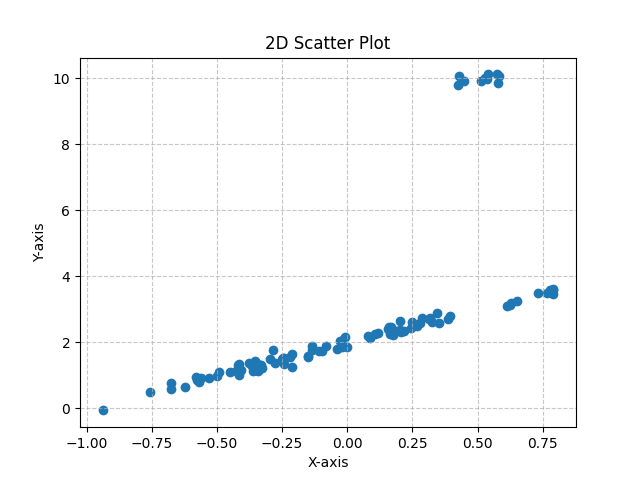

In [5]:
%matplotlib widget

def f1(x):
    return x * 2 + 2
def f2(x):
    if x > 0.4 and x < 0.6:
        return 10
    else:
        return f1(x)
x = generate_indipendent(count=100, randomness=0.5)
y = generate_dependent(x, f2, output_variance=0.01)
draw_2d_scatter(x, y)

In [6]:
x = generate_indipendent(count=100, randomness=0.5)
y = generate_dependent(x, f2, output_variance=0.001)
print(linear_regression(x, y))

(4.571938088393881, 2.840589136666285)


C:\Users\Frederik\AppData\Local\Temp\ipykernel_1080\745825987.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x, y, z, c=colorsys.hls_to_rgb(index * (1 / len(series)), 0.5, 1.0), marker='o')


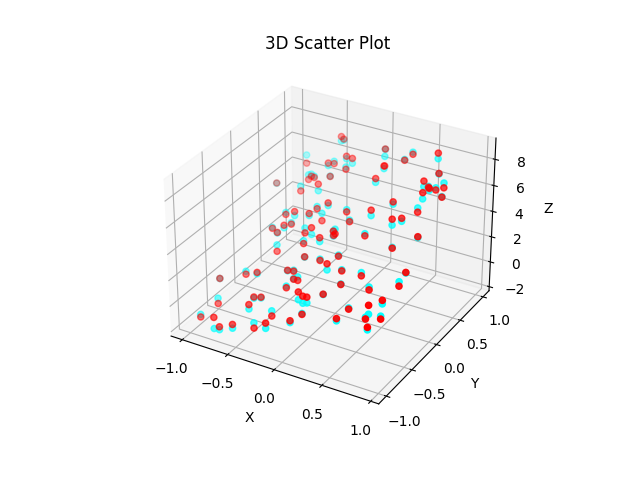

In [11]:
%matplotlib widget

def f4(variables):
    [x, y] = variables
    return x * 2 + y * 4 + 4

x = generate_indipendent(count=100, randomness=1)
y = generate_indipendent(count=100, randomness=1)
z = generate_dependent([[x, y] for x, y in zip(x,y)], f4, output_variance=0.1)

xd, xc = linear_regression(x, z)
yd, yc = linear_regression(y, z)
def zd(variables):
    [x, y] = variables
    return xd * x + yd * y + (xc + yc) / 2
zp = generate_dependent([[x, y] for x, y in zip(x,y)], f4, output_variance=0.0)

draw_3d_scatter([(x, y, z), (x, y, zp)])
